# Motivation

In [1]:
%%capture
import stata_setup, os
if os.name == 'nt':
    stata_setup.config('C:/Program Files/Stata17/','mp')
else:
    stata_setup.config('/usr/local/stata17','mp')

In [2]:
from sfi import Data
from pystata import stata
import numpy as np
import pandas as pd

In [3]:
%%stata -qui

use "../data/data", clear
rename log_flesch_kincaid_grade_level FKG
quietly tabulate year, generate(y_)
quietly tabulate cluster, generate(c_)

local journals ecm jpe qje res  //AER based category

local jel_imp a_imp b_imp c_imp  e_imp f_imp g_imp h_imp i_imp j_imp k_imp ///
              l_imp m_imp n_imp o_imp p_imp q_imp r_imp y_imp z_imp // D JEL based case

In [4]:
%%capture captured_output
stata.run('''
          display "`journals'"
          ''')

In [5]:
output = captured_output.stdout
lines = output.splitlines()
journals_output = lines[-4].strip()
journals = stata.pdataframe_from_data(var=journals_output)
print(journals.sample(n=10, random_state=542))


      ecm  jpe  qje  res
4707    0    0    0    1
3807    0    0    1    0
4579    0    0    0    1
4551    0    0    0    1
101     0    0    0    0
4817    0    0    0    1
4932    0    0    0    1
700     0    0    0    0
2711    0    1    0    0
3349    0    0    1    0


In [6]:
jel_imp = stata.pdataframe_from_data(var="a_imp b_imp c_imp  e_imp f_imp g_imp h_imp i_imp j_imp k_imp l_imp m_imp n_imp o_imp p_imp q_imp r_imp y_imp z_imp")
print(jel_imp.sample(n=10, random_state=542))

      a_imp  b_imp  c_imp  e_imp  f_imp  g_imp  h_imp  i_imp  j_imp  k_imp  \
4707      0      0      0      0      0      0      0      0      1      0   
3807      0      0      0      0      0      1      0      0      0      0   
4579      0      0      0      0      0      0      0      0      1      1   
4551      0      0      1      0      0      0      0      0      0      0   
101       0      0      0      0      0      0      1      0      0      0   
4817      0      0      1      1      0      0      0      0      0      0   
4932      0      0      0      0      0      0      0      0      1      0   
700       0      0      0      0      0      0      0      0      0      1   
2711      0      0      0      0      0      0      0      1      1      0   
3349      0      0      1      0      0      0      0      0      0      0   

      l_imp  m_imp  n_imp  o_imp  p_imp  q_imp  r_imp  y_imp  z_imp  
4707      0      0      0      0      0      0      0      0      0  
3

In [7]:
%%capture captured_output
stata.run('ds y_2-y_20')

In [8]:
output = captured_output.stdout
year_output = output.strip()
year = stata.pdataframe_from_data(var=year_output)
print(year.sample(n=10, random_state=542))

      y_2  y_4  y_6  y_8  y_10  y_12  y_14  y_16  y_18  y_20  y_3  y_5  y_7  \
4707    0    0    0    0     0     0     0     1     0     0    0    0    0   
3807    0    0    0    0     0     0     0     0     0     0    0    0    0   
4579    0    0    0    0     0     0     0     0     0     0    0    0    0   
4551    0    0    0    0     0     0     0     0     0     0    0    0    0   
101     0    0    0    0     0     0     0     0     0     0    1    0    0   
4817    0    0    0    0     0     0     0     0     1     0    0    0    0   
4932    0    0    0    0     0     0     0     0     0     1    0    0    0   
700     0    0    0    0     0     1     0     0     0     0    0    0    0   
2711    0    0    0    1     0     0     0     0     0     0    0    0    0   
3349    0    1    0    0     0     0     0     0     0     0    0    0    0   

      y_9  y_11  y_13  y_15  y_17  y_19  
4707    0     0     0     0     0     0  
3807    0     0     0     1     0     0  
4579

In [9]:
%%capture captured_output
stata.run('ds c_2-c_215')

In [10]:
output = captured_output.stdout
cluster_output = output.strip()
cluster = stata.pdataframe_from_data(var=cluster_output)
print(cluster.sample(n=10, random_state=542))

      c_2  c_22  c_42  c_62  c_82  c_102  c_122  c_142  c_162  c_182  ...  \
4707    1     0     0     0     0      0      0      0      0      0  ...   
3807    1     0     0     0     0      0      0      0      0      0  ...   
4579    1     0     0     0     0      0      0      0      0      0  ...   
4551    0     0     0     0     0      0      0      0      0      0  ...   
101     1     0     0     0     0      0      0      0      0      0  ...   
4817    1     0     0     0     0      0      0      0      0      0  ...   
4932    0     0     0     0     0      0      0      0      0      0  ...   
700     1     0     0     0     0      0      0      0      0      0  ...   
2711    1     0     0     0     0      0      0      0      0      0  ...   
3349    1     0     0     0     0      0      0      0      0      0  ...   

      c_21  c_41  c_61  c_81  c_101  c_121  c_141  c_161  c_181  c_201  
4707     0     0     0     0      0      0      0      0      0      0  
3807  

In [11]:
jel_flag = stata.pdataframe_from_data(var="jel_flag")
print(jel_flag.sample(n=10, random_state=542))

      jel_flag
4707         1
3807         1
4579         1
4551         0
101          1
4817         1
4932         0
700          1
2711         0
3349         0


# High-Dimensional Fixed Effects

In [12]:
%%stata
egen journal1 = group(journal)
#delimit ;
reghdfe FKG log_num_authors log_num_pages both_genders prop_women,
        absorb(journal1 a_imp b_imp c_imp  e_imp f_imp g_imp h_imp
               i_imp j_imp k_imp l_imp m_imp n_imp o_imp p_imp q_imp r_imp y_imp z_imp
               year ib0.cluster jel_flag) vce(cluster cluster);
#delimit cr


. egen journal1 = group(journal)

. #delimit ;
delimiter now ;
. reghdfe FKG log_num_authors log_num_pages both_genders prop_women,
>         absorb(journal1 a_imp b_imp c_imp  e_imp f_imp g_imp h_imp
>                i_imp j_imp k_imp l_imp m_imp n_imp o_imp p_imp q_imp r_imp y_
> imp z_imp
>                year ib0.cluster jel_flag) vce(cluster cluster);
(dropped 1 singleton observations)
(MWFE estimator converged in 9 iterations)

HDFE Linear regression                            Number of obs   =      4,987
Absorbing 23 HDFE groups                          F(   4,    214) =       5.90
Statistics robust to heteroskedasticity           Prob > F        =     0.0002
                                                  R-squared       =     0.0921
                                                  Adj R-squared   =     0.0421
                                                  Within R-sq.    =     0.0019
Number of clusters (cluster) =        215         Root MSE        =     0.1642

       

# Specification Curve Analysis

Clearing the data set in memory, reloading, and creating the ```journal1``` variable

In [13]:
%%stata -qui

clear all
use "../data/data", clear
egen journal1 = group(journal)

Modigying the ```.yml``` file by uncommenting the output variable ```log_flesch_kincaid_grade_level```:

In [14]:
import yaml

# File name
file_path = '../code/readability_graph_specurve.yml'

# Read, modify, and save the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Modify the target line
modified_lines = []
for line in lines:
    stripped_line = line.strip()
    if stripped_line.startswith("#     - log(F-K grade): log_flesch_kincaid_grade_level"):
        # Uncomment the line
        modified_lines.append(line.replace("#     -", "-"))  # Replace `#-` with `-`
    else:
        modified_lines.append(line)

# Write the modified content back to the file
with open(file_path, 'w') as file:
    file.writelines(modified_lines)

print("Line uncommented successfully if it was commented!")

Line uncommented successfully if it was commented!


Modifying the ```.yml``` file by uncommenting the regressor ```prop_women```:

In [15]:
# File name
file_path = '../code/readability_graph_specurve.yml'

# Read, modify, and save the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Modify the target line
modified_lines = []
for line in lines:
    stripped_line = line.strip()
    if stripped_line.startswith("#     - Proportion of women: prop_women"):
        # Uncomment the line
        modified_lines.append(line.replace("#     -", "-"))  # Replace `#-` with `-`
    else:
        modified_lines.append(line)

# Write the modified content back to the file
with open(file_path, 'w') as file:
    file.writelines(modified_lines)

print("Line uncommented successfully if it was commented!")

Line uncommented successfully if it was commented!


Creating the specification curve by concentratng on the effect of ```prop_women``` on the outcome variable ```log_flesch_kincaid_grade_level```, by always controlling for the following regressors: ```both_genders```, ```log_num_authors```, ```log_num_pages```, and ```jel_flag```.


. #delimit ;
delimiter now ;
. quietly specurve using "readability_graph_specurve.yml",
>         desc noci99 width(8) height(10) relativesize(0.4)
>         scale(0.7) title("Specification Curve Analsyis of Proportion of Women
> ");

. #delimit crs
delimiter now ;
. 


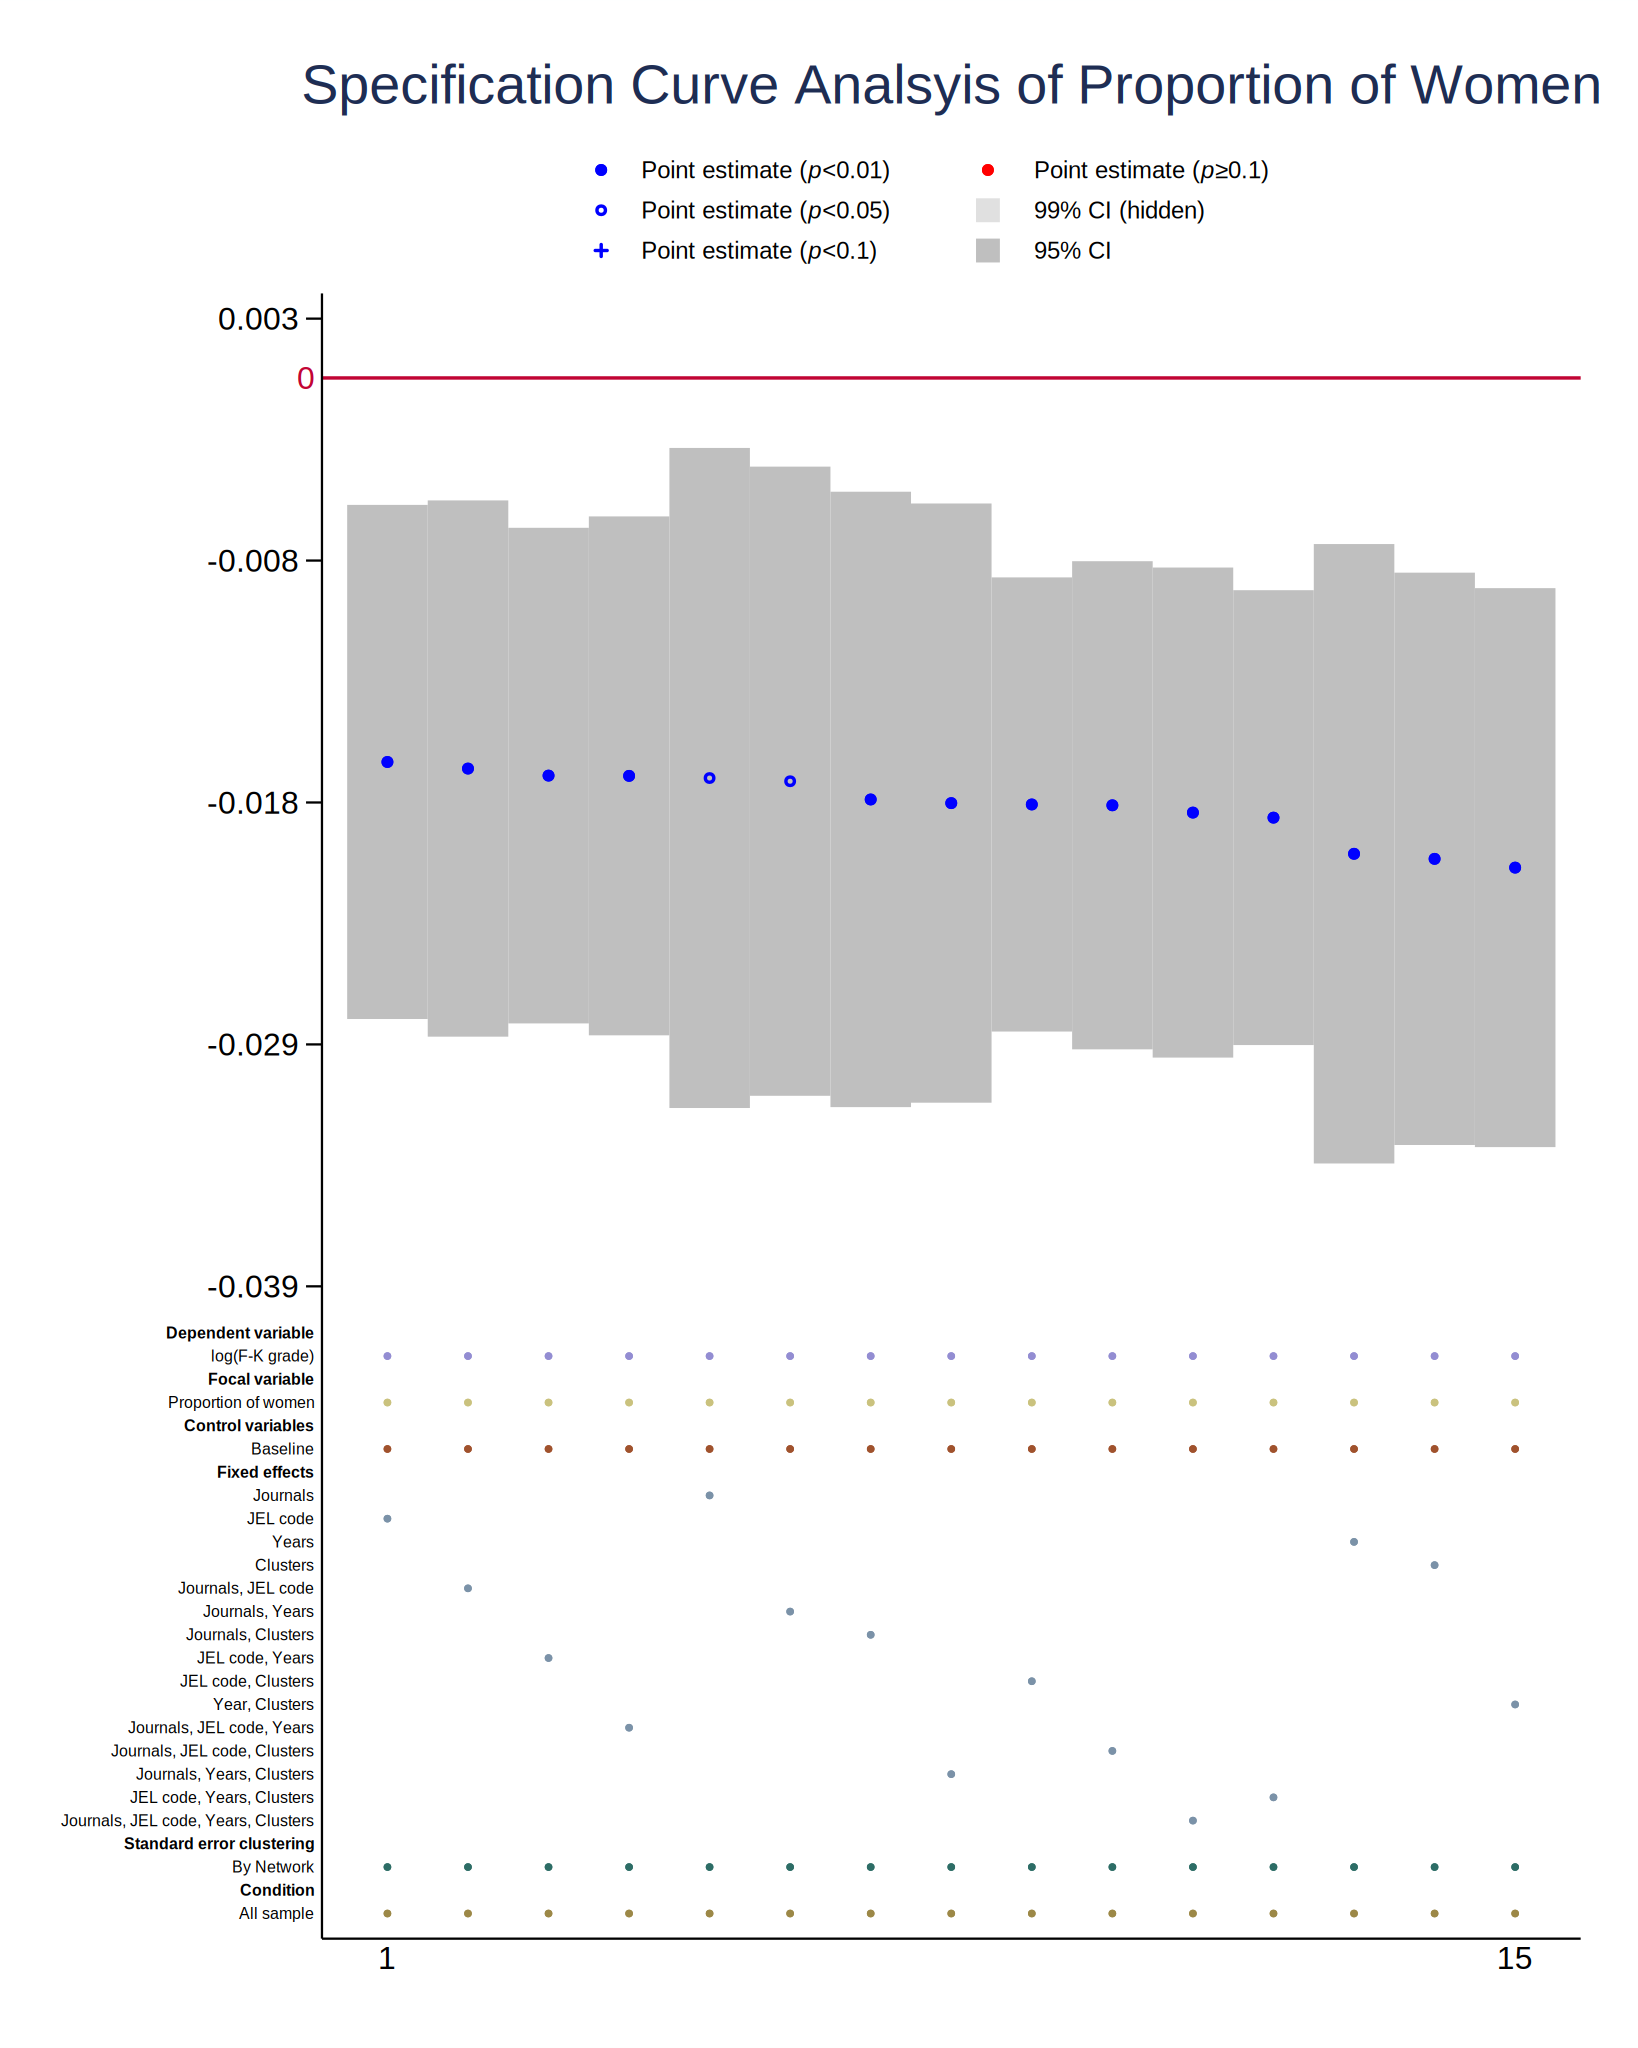

In [16]:
%%stata
#delimit ;
quietly specurve using "readability_graph_specurve.yml",
        desc noci99 width(8) height(10) relativesize(0.4)
        scale(0.7) title("Specification Curve Analsyis of Proportion of Women");
#delimit crs